In [1]:
import numpy as np
import scipy.integrate as integrate
import statistics
import pylab
from matplotlib import axes as ax
from scipy.stats import t
from matplotlib.axes import Axes
import statsmodels.graphics as sg
from statsmodels.graphics import gofplots
import statsmodels.api as sm
import  seaborn  as  sns 
from scipy import stats
import scipy.stats as st
from scipy.stats import laplace
from scipy.stats import norm
import matplotlib.pyplot as plt
import math
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import kstest 
%matplotlib inline
import pandas as pd

In [2]:
df = pd.read_csv("table1.csv",sep=None, engine='python')
df.head()

,Number play,2,2w,3,3w,4,4w,5,5w,6,6w
0,1779,16328,10,2201,24,113,641,3,30208,0,20532000
1,1778,17268,10,2342,23,138,527,6,15170,0,20482000
2,1777,16860,10,2444,21,132,530,0,0,0,20432000
3,1776,17233,10,2153,25,120,605,1,90831,0,20382000
4,1775,14781,10,1786,27,89,729,1,81188,0,20332000


In [3]:
df1 = df.drop(df[df['5'] ==0].index,axis=0)
df1.to_csv("2.csv", index_label = True)
df1

,Number play,2,2w,3,3w,4,4w,5,5w,6,6w
0,1779,16328,10,2201,24,113,641,3,30208,0,20532000
1,1778,17268,10,2342,23,138,527,6,15170,0,20482000
3,1776,17233,10,2153,25,120,605,1,90831,0,20382000
4,1775,14781,10,1786,27,89,729,1,81188,0,20332000
6,1773,17964,10,2359,22,117,601,2,43987,0,20232000
9,1770,15671,10,1566,43,58,1562,1,113311,0,20082000
10,1769,18130,10,2470,22,128,587,3,31307,0,20032000
11,1768,16455,10,1761,33,67,1188,2,49789,0,19982000
12,1767,16720,10,1832,33,95,862,2,51199,0,19932000
13,1766,16567,10,1908,30,128,610,6,16271,0,19882000


In [4]:
df1 = pd.read_csv("2.csv",sep=',', engine='python')
df1.head()

,True,Number play,2,2w,3,3w,4,4w,5,5w,6,6w
0,0,1779,16328,10,2201,24,113,641,3,30208,0,20532000
1,1,1778,17268,10,2342,23,138,527,6,15170,0,20482000
2,3,1776,17233,10,2153,25,120,605,1,90831,0,20382000
3,4,1775,14781,10,1786,27,89,729,1,81188,0,20332000
4,6,1773,17964,10,2359,22,117,601,2,43987,0,20232000


In [5]:
df2=df.drop(df[df['5'] !=0].index,axis=0)
df2.to_csv("22.csv", index_label = True)
df2

,Number play,2,2w,3,3w,4,4w,5,5w,6,6w
2,1777,16860,10,2444,21,132,530,0,0,0,20432000
5,1774,18805,10,2061,31,93,924,0,0,0,20282000
7,1772,17735,10,2196,27,110,740,0,0,0,20182000
8,1771,18713,10,2400,22,125,578,0,0,0,20132000
16,1763,13867,10,1692,27,112,548,0,0,0,19732000
26,1753,13665,10,1338,40,62,1166,0,0,0,19000000
30,1749,13130,10,1596,29,64,995,0,0,0,18600000
33,1746,18753,10,2189,29,106,817,0,0,0,18300000
34,1745,16463,10,2228,22,163,402,0,0,0,18200000
35,1744,13892,10,1687,30,78,893,0,0,0,18100000


In [6]:
df2 = pd.read_csv("22.csv",sep=',', engine='python')
df2.head()

,True,Number play,2,2w,3,3w,4,4w,5,5w,6,6w
0,2,1777,16860,10,2444,21,132,530,0,0,0,20432000
1,5,1774,18805,10,2061,31,93,924,0,0,0,20282000
2,7,1772,17735,10,2196,27,110,740,0,0,0,20182000
3,8,1771,18713,10,2400,22,125,578,0,0,0,20132000
4,16,1763,13867,10,1692,27,112,548,0,0,0,19732000


In [7]:
summ = (df['2']*df['2w']+df['3']*df['3w']+df['4']*df['4w']+df['5']*df['5w']+df['6']*df['6w'])
print('загальна сума виплат за кожним розіграшем')
print(summ)
print(summ.describe())
print('дисперсія')
print(summ.var())
print('інтерквартильний розмах')
print(summ.describe()[6]-summ.describe()[4])

загальна сума виплат за кожним розіграшем
0     379161
1     390292
2     289884
3     389586
4     342101
5     337873
6     389829
7     318042
8     312180
9     427955
10    404697
11    401837
12    411944
13    398616
14    375270
15    369961
16    245730
17    373286
18    354739
19    373035
20    371650
21    370575
22    349274
23    344746
24    361741
25    372571
26    262462
27    389679
28    327778
29    363293
30    241264
31    374902
32    321839
33    337613
34    279172
35    259184
36    264154
37    346760
38    334619
39    343877
40    234339
41    334479
42    323679
43    252934
44    340246
45    264533
46    240945
47    249725
48    326417
49    343226
dtype: int64
count        50.000000
mean     336273.880000
std       52081.063226
min      234339.000000
25%      313645.500000
50%      343551.500000
75%      373223.250000
max      427955.000000
dtype: float64
дисперсія
2712437146.72
інтерквартильний розмах
59577.75


In [8]:
df3 = pd.read_csv("table.csv",sep=None, engine='python',usecols = ['2', '3', '4', '5', '6'])
df3.head()
mean = summ/(df3.sum(axis=1))
print('середнє')
print(mean)
print('середнє з усіх розіграшів з середніх',np.mean(mean))
print(np.std(mean))

середнє
0     20.335800
1     19.757619
2     14.914797
3     19.971600
4     20.537972
5     16.120664
6     19.070003
7     15.869567
8     14.699124
9     24.743004
10    19.521345
11    21.976319
12    22.089335
13    21.420603
14    22.451092
15    19.455248
16    15.680556
17    19.456166
18    23.012585
19    20.394456
20    19.105022
21    19.325945
22    21.379323
23    20.281563
24    19.214969
25    19.975926
26    17.421971
27    18.938521
28    22.944001
29    19.962251
30    16.312644
31    19.568953
32    19.252198
33    16.040146
34    14.807044
35    16.553874
36    16.051164
37    20.833934
38    21.138282
39    19.476495
40    17.267630
41    19.913020
42    20.434280
43    16.739510
44    18.853327
45    16.770191
46    15.359533
47    16.731993
48    21.093183
49    18.330805
dtype: float64
середнє з усіх розіграшів з середніх 19.031111116624746
2.371558003961606


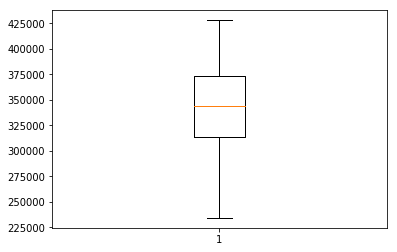

In [9]:
plt.boxplot(summ)
plt.show()

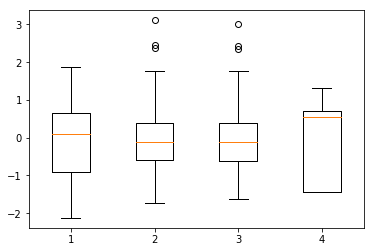

In [10]:
a = (df['2w']*df['2'] - np.mean(df['2w']*df['2']))/np.std(df['2w']*df['2'])
b=(df['3w']*df['3'] - np.mean(df['3w']*df['3']))/np.std(df['3w']*df['3'])
c=(df['4w']*df['4'] - np.mean(df['4w']*df['4']))/np.std(df['4w']*df['4'])
d=(df['5w']*df['5'] -np.mean(df['5w']*df['5']))/np.std(df['5w']*df['5'])
d=[a,b,c,d]
plt.boxplot(d)
plt.show()

In [11]:
a=df1['2'],df1['3'],df1['4'],df1['5']


In [12]:
def fact(n,k):
    return math.factorial(n)/ math.factorial(n-k)/ math.factorial(k)
b=[]
for i in range(2,6):
    b.append((a[i-2]*fact(52,6)/fact(6,i)/fact(46,6-i)))

N=[]
for i in range(4):
    N.append([])
    for j in range(34):
        N[i].append(math.floor(b[i][j]))
v=np.mean(N,axis=0) 
p=[]
for i in range(len(v)):
    p.append(math.floor(v[i]))
p

[163215,
 231051,
 129706,
 108292,
 152136,
 96292,
 176389,
 122582,
 133503,
 219040,
 155216,
 156892,
 168499,
 92747,
 117409,
 205214,
 154235,
 115423,
 126911,
 127235,
 157910,
 150538,
 91455,
 160072,
 125656,
 132550,
 138564,
 102850,
 133366,
 108256,
 120913,
 160418,
 87734,
 158463]

In [13]:
x=df2['2'],df2['3'],df2['4']
y = df['2w'],df['3w'],df['4w'],df['5w'],df['6w']

In [14]:
z=[]
for i in range(2,5):
    z.append(x[i-2]*fact(52,6)/fact(6,i)/fact(46,6-i))
Ex=[]
for i in range(2,7):
    Ex.append((fact(6,i)*fact(46,6-i)/fact(52,6)*y[i-2]))
Exx=sum(Ex)
print('mean expectation win ' )
print(Exx.mean())
M=[]
for i in range(4):
    M.append([])
    for j in range(16):
        M[i].append(math.floor(b[i][j]))
w=np.mean(M,axis=0) 
r=[]
for i in range(len(w)):
    r.append(math.floor(w[i]))
r

mean expectation win 
3.6072135440100754


[163215,
 231051,
 129706,
 108292,
 152136,
 96292,
 176389,
 122582,
 133503,
 219040,
 155216,
 156892,
 168499,
 92747,
 117409,
 205214]

In [15]:
df1['mean']=p
df1
df1['earn']=8*df1['mean']-df1['5w']*df1['5']-df1['4w']*df1['4']-df1['2w']*df1['2']-df1['3w']*df1['3']
df1

,True,Number play,2,2w,3,3w,4,4w,5,5w,6,6w,mean,earn
0,0,1779,16328,10,2201,24,113,641,3,30208,0,20532000,163215,926559
1,1,1778,17268,10,2342,23,138,527,6,15170,0,20482000,231051,1458116
2,3,1776,17233,10,2153,25,120,605,1,90831,0,20382000,129706,648062
3,4,1775,14781,10,1786,27,89,729,1,81188,0,20332000,108292,524235
4,6,1773,17964,10,2359,22,117,601,2,43987,0,20232000,152136,827259
5,9,1770,15671,10,1566,43,58,1562,1,113311,0,20082000,96292,342381
6,10,1769,18130,10,2470,22,128,587,3,31307,0,20032000,176389,1006415
7,11,1768,16455,10,1761,33,67,1188,2,49789,0,19982000,122582,578819
8,12,1767,16720,10,1832,33,95,862,2,51199,0,19932000,133503,656080
9,13,1766,16567,10,1908,30,128,610,6,16271,0,19882000,219040,1353704


In [16]:
df2['mean']=r
df2
df2['earn']=8*df2['mean']-df2['4w']*df2['4']-df2['2w']*df2['2']-df2['3w']*df2['3']
df2


,True,Number play,2,2w,3,3w,4,4w,5,5w,6,6w,mean,earn
0,2,1777,16860,10,2444,21,132,530,0,0,0,20432000,163215,1015836
1,5,1774,18805,10,2061,31,93,924,0,0,0,20282000,231051,1510535
2,7,1772,17735,10,2196,27,110,740,0,0,0,20182000,129706,719606
3,8,1771,18713,10,2400,22,125,578,0,0,0,20132000,108292,554156
4,16,1763,13867,10,1692,27,112,548,0,0,0,19732000,152136,971358
5,26,1753,13665,10,1338,40,62,1166,0,0,0,19000000,96292,507874
6,30,1749,13130,10,1596,29,64,995,0,0,0,18600000,176389,1169848
7,33,1746,18753,10,2189,29,106,817,0,0,0,18300000,122582,643043
8,34,1745,16463,10,2228,22,163,402,0,0,0,18200000,133503,788852
9,35,1744,13892,10,1687,30,78,893,0,0,0,18100000,219040,1493136
